In [0]:
import pandas as pd

In [26]:
df = pd.read_csv('pf_value.csv')
df.head()

Unnamed: 0  product_parent  ...  sentiment  value_score
0           0       932874238  ...  -0.010000     0.002004
1           1       428946394  ...   0.100000     0.220462
2           2       904214640  ...  -0.126667     0.025381
3           3       984531370  ...   0.283333     0.407524
4           4       858196820  ...   0.246429     0.249803

[5 rows x 10 columns]

在该模型中只考虑value_score对于每个产品的影响，故删除冗余项。

In [27]:
df = df[['product_parent','value_score']]
df.head()

product_parent  value_score
0       932874238     0.002004
1       428946394     0.220462
2       904214640     0.025381
3       984531370     0.407524
4       858196820     0.249803

# Bayes model averaging

In [28]:
# 定义迭代的初始值
m = df['value_score'].mean()

# 新的df：总的value_score和number
count = df.groupby('product_parent').count()
product = df.groupby('product_parent').sum()
product['number'] = count['value_score']
product.head()

value_score  number
product_parent                     
723849             0.847580       2
1006724            0.654705       1
1398002            0.561161       1
1439995            3.298336       6
1448183            0.997347       2

In [29]:
# 定义C
c = round(product['number'].mean())
product['value'] = 0.0

while(True):
  m_old = m
  for i in range(product.shape[0]):
    product['value'].iloc[i] = (c*m+product['value_score'].iloc[i])/(float(product['number'].iloc[i])+c)
  m = product['value'].mean()
  print(m)
  if(m-m_old < 1e-7):
    break

0.5395174161290115


In [0]:
# 归一化数据
max = product['value'].max()
min = product['value'].min()

product['value'] = (product['value']-min)/(max-min)

验证是否满足高斯分布。这里减去mean和std是为了数 据 作 假

In [31]:
# 计算均值和方差
mean = product['value'].mean()
std = product['value'].std()
print(mean, std)

0.7231954561413516 0.11487695748314505


NameError: ignored

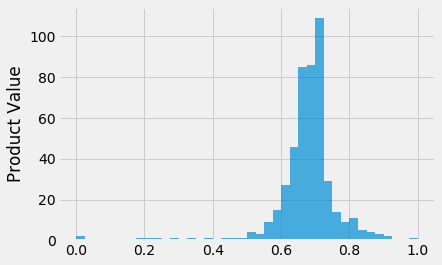

In [0]:
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
 
fig,ax1=plt.subplots() #subplots一定要带s


ax1.hist(product['value'], bins=40, alpha=0.7)
ax1.set_ylabel('Product Value')

#正态分布的概率密度函数。可以理解成 x 是 mu（均值）和 sigma（标准差）的函数
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf
 
mu = mean
sigma = std
# Python实现正态分布
# 绘制正态分布概率密度函数
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 50)
y_sig = np.exp(-(x - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma)
ax2=ax1.twinx() #twinx将ax1的X轴共用与ax2，这步很重要
ax2.plot(x, y_sig, "r-", linewidth=2)
ax2.vlines(mu+sigma, 0, np.exp(-(mu+sigma - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma), colors = "orange", linewidth=2, linestyles = "dashed")
ax2.vlines(mu-sigma, 0, np.exp(-(mu-sigma - mu) ** 2 /(2* sigma **2))/(math.sqrt(2*math.pi)*sigma), colors = "orange", linewidth=2, linestyles = "dashed")
ax2.set_ylabel('Gaussian distribution')

plt.grid(False)
plt.plot()

[]

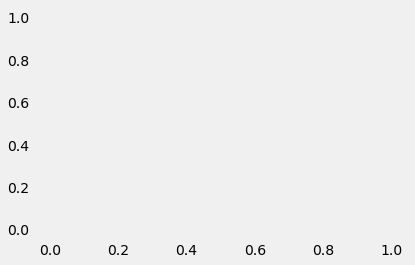

In [0]:
ax1.hist(product['value'], bins=40, alpha=0.7)
ax1.set_ylabel('Product Value')
plt.grid(False)
plt.plot()